Plot saved as top_10_locations.png
The difference in average rating is: 0.06355693452877675


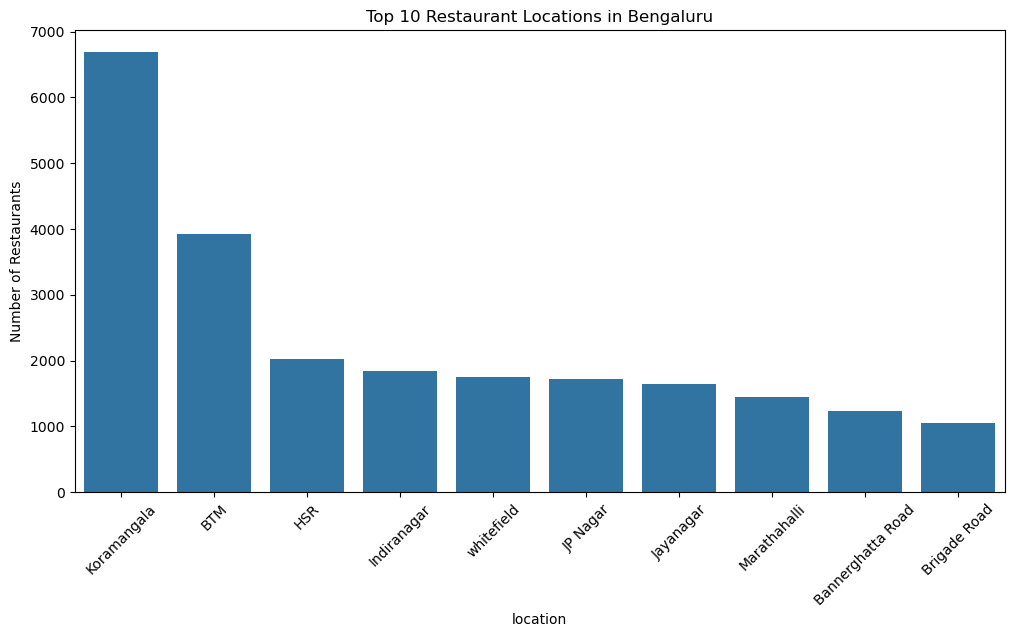

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
df=pd.read_csv("zomato.csv")
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')
df =df.drop(['url','address','phone'],axis=1)
df=df.drop_duplicates()
df['rate']=df['rate'].str.replace('/5','').str.strip()
df['rate']=df['rate'].replace(['NEW','-'],np.nan)
df['rate']=df['rate'].astype(float)
df=df.dropna(subset=['rate'])
df['approx_cost(for_two_people)']=df['approx_cost(for_two_people)'].str.replace(',','')
df['approx_cost(for_two_people)']=df['approx_cost(for_two_people)'].astype(float)   
koramangala_list = [
    'Koramangala 5th Block', 'Koramangala 7th Block', 
    'Koramangala 1st Block', 'Koramangala 8th Block', 
    'Koramangala 6th Block', 'Koramangala 2nd Block', 
    'Koramangala 3rd Block', 'Koramangala 4th Block'
]
df['location'] = df['location'].replace(koramangala_list, 'Koramangala')
whitefield_list=['Whitefield',
                 'ITPL Main Road, Whitefield',
                 'Varthur Main Road, Whitefield'
                ]
df['location'] = df['location'].replace(whitefield_list, 'whitefield')
location_count=df['location'].value_counts().head(10)
df_yes=df.query('online_order =="Yes"')
df_no = df.query('online_order == "No"')
mean_rating_yes = df_yes['rate'].mean()
mean_rating_no = df_no['rate'].mean()
mean_diff = mean_rating_yes - mean_rating_no
plt.figure(figsize=(12,6))
sns.barplot(x=location_count.index, y =location_count.values)
plt.title('Top 10 Restaurant Locations in Bengaluru')
plt.xlabel('location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.savefig('top_10_locations.png')
print("Plot saved as top_10_locations.png")
print("The difference in average rating is:", mean_diff)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41627 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         41627 non-null  object 
 1   online_order                 41627 non-null  object 
 2   book_table                   41627 non-null  object 
 3   rate                         41627 non-null  float64
 4   votes                        41627 non-null  int64  
 5   location                     41627 non-null  object 
 6   rest_type                    41478 non-null  object 
 7   dish_liked                   23450 non-null  object 
 8   cuisines                     41616 non-null  object 
 9   approx_cost(for_two_people)  41381 non-null  float64
 10  reviews_list                 41627 non-null  object 
 11  menu_item                    41627 non-null  object 
 12  listed_in(type)              41627 non-null  object 
 13  listed_in(city)      